In [2]:
from main import Main
from plot_data import plot_data, plot_runs
import matplotlib.pyplot as plt

Multiple experiments need to be tried out. This notebook will be used to document the whole process.

First starting with the basic FNN on Warehouse.
Parameters: num_fc_units: [640, 256]

log files and model:
output03-29-2021-18-07-36.txt
Warehouse_03-29-2021-18-07-36.pt

command: `main.py --env-name "Warehouse" --yaml-file FNN --algo ppo --use-gae --lr 2.5e-4 --clip-param 0.1 --value-loss-coef 1 --num-processes 8 --num-steps 4 --num-mini-batch 32 --log-interval 30 --use-linear-lr-decay --entropy-coef 0.01  --cuda-deterministic`


LSTM network on Warehouse
Parameters: num_fc_units: [640]

IAM network on Warehouse (Didn't have the A matrix yet)

Parameters: num_fc_units: [512, 256], rnn_units: [128]
(num-processes should be equal to num-mini-batch)
command: `main.py --env-name "Warehouse" --yaml-file IAM_static --recurrent-policy --num-processes 8 --num-steps 8 --num-mini-batch 8 --log-interval 30 --use-linear-lr-decay --entropy-coef 0.01 --algo ppo --use-gae --lr 2.5e-4 --clip-param 0.1 --value-loss-coef 1  --cuda-deterministic`

In [5]:
args = "--env-name Warehouse --yaml-file IAM_static --recurrent-policy --num-processes 1 --num-steps 8 --num-mini-batch 1 --log-interval 30 --use-linear-lr-decay --entropy-coef 0.01 --algo ppo --use-gae --lr 2.5e-4 --clip-param 0.1 --value-loss-coef 1"
arg_list = args.split(" ")
main = Main(arg_list)
main.run()

Currently using configfile:  configs/warehouse/IAM_static.yaml
Log file:  data/output04-02-2021-15-05-24.txt
Starting new run: with args Namespace(algo='ppo', alpha=0.99, clip_param=0.1, cuda=False, cuda_deterministic=False, entropy_coef=0.01, env_name='Warehouse', eps=1e-05, eval_interval=None, gae_lambda=0.95, gail=False, gail_batch_size=128, gail_epoch=5, gail_experts_dir='./gail_experts', gamma=0.99, log_dir='/tmp/gym/', log_interval=30, lr=0.00025, max_grad_norm=0.5, no_cuda=False, num_env_steps=10000000.0, num_mini_batch=1, num_processes=1, num_steps=8, ppo_epoch=4, recurrent_policy=True, save_dir='./trained_models/', save_interval=100, seed=1, use_gae=True, use_linear_lr_decay=True, use_proper_time_limits=False, value_loss_coef=1.0, yaml_file='IAM_static')
And parameters: {'env_type': 'warehouse', 'num_frames': 1, 'num_fc_layers': 2, 'num_fc_units': [256], 'influence': True, 'attention': False, 'automatic_dpatch': False, 'manual_dpatch': True, 'inf_num_predictors': 73, 'dset': [

KeyboardInterrupt: 

data/output03-29-2021-19-53-54.txt
time_elapsed: 0 seconds or 0 minutes


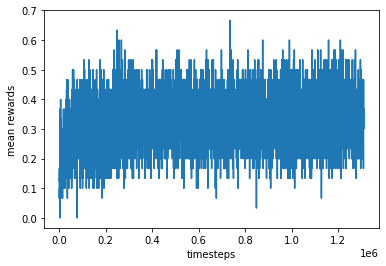

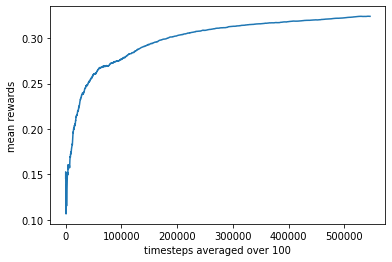

In [6]:
# Trained IAM model: Missing total training time.
# This was one of the first runs. Using a GRU as RNN
plot_data("output03-29-2021-19-53-54.txt")

IAM dynamic network on Breakout

In [ ]:
args = "--env-name BreakoutNoFrameskip-v4 --yaml-file IAM_static --fnn-hidden-sizes 256 --rec-hidden-size 256 --recurrent-policy --num-processes 8 --num-steps 8 --num-mini-batch 1 --cuda-deterministic --log-interval 30 --use-linear-lr-decay --entropy-coef 0.01 --algo ppo --use-gae --lr 2.5e-4 --clip-param 0.1 --value-loss-coef 1"
arg_list = args.split(" ")
main = Main(arg_list)
main.run()

data/output03-31-2021-23-16-25.txt
time_elapsed: 32781 seconds or 546 minutes


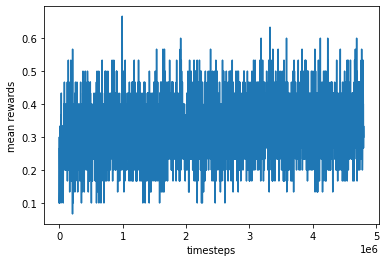

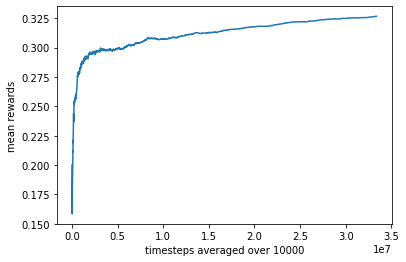

In [2]:
# Trained IAM model with static d set. Which is currently a linear layer which process the input by calling it with input as parameter.
# Doesnt work well :(
plot_data("output03-31-2021-23-16-25.txt")


data/output03-31-2021-20-56-12.txt
time_elapsed: 4063 seconds or 67 minutes


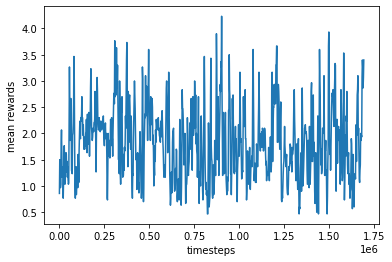

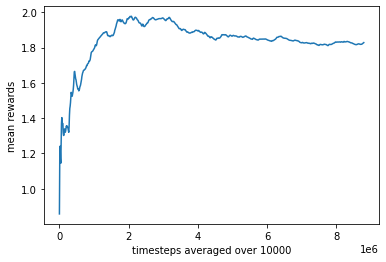

In [3]:
plot_data("output03-31-2021-20-56-12.txt")

In [9]:
# Redoing IAM network on Warehouse with IAMBase model this time including the A matrix. But still not sure if correctly implemented.
# --env-name Warehouse --yaml-file IAM_static --fnn-hidden-sizes 256 --recurrent-policy --num-processes 8 --num-steps 8 --num-mini-batch 1 --log-interval 30 --use-linear-lr-decay --entropy-coef 0.01 --algo ppo --use-gae --lr 2.5e-4 --clip-param 0.1 --value-loss-coef 1 --cuda-deterministic
plot_data("output03-31-2021-22-39-40.txt")

data/output03-31-2021-22-39-40.txt


FileNotFoundError: [Errno 2] No such file or directory: 'data/output03-31-2021-22-39-40.txt'

data/output04-02-2021-16-17-06.txt
time_elapsed: 5978 seconds or 99 minutes


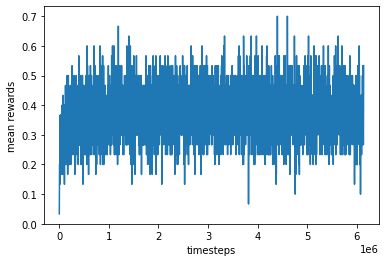

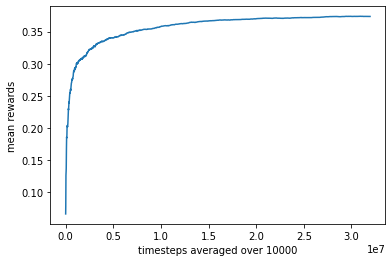

In [5]:
# Redoing IAM network on Warehouse with IAMBase model with reduced hidden rnn size of 25
# --env-name Warehouse --yaml-file IAM_static --fnn-hidden-sizes 256 --rec-hidden-size 25 --num-processes 8 --num-steps 8 --num-mini-batch 1  --recurrent-policy --log-interval 30 --use-linear-lr-decay --entropy-coef 0.01 --algo ppo --use-gae --lr 2.5e-4 --clip-param 0.1 --value-loss-coef 1
plot_data("output04-02-2021-16-17-06.txt")

In [ ]:


# Loading model and plot weights
import torch
import matplotlib.pyplot as plt
import numpy as np
from reproduction_model import IAMPolicy, IAMBase
# path = 'trained_models\ppo\Warehouse_03-31-2021-23-15-04.pt'
path = 'trained_models\ppo\Warehouse_03-31-2021-23-16-25.pt'
iam_policy: IAMPolicy = torch.load(path)[0]
base: IAMBase = iam_policy.base
# base.static_A_matrix.weight

plt.figure()
agent_pos = base.static_A_matrix.weight.cpu().detach().numpy()
plt.imshow(base.static_A_matrix.weight.cpu().detach().numpy())
plt.show()
item_squares = base.static_A_matrix.bias.cpu().detach().numpy()[49:]
img = np.empty((7,7))
img[0,:] = item_squares[:7]
for i in range(0,5):
    img[i+1,0] = item_squares[7+i*2]
    img[i+1,-1] = item_squares[7+i*2+1]
img[-1,:] = item_squares[24-7:]

for x in range(7):
    for y in range(7):
        img[x,y] += agent_pos[x,y]
plt.imshow(img)
plt.show()

data/output04-06-2021-17-29-07.txt
time_elapsed: 17092 seconds or 284 minutes
Final reward:  33.07692307692305
data/output04-06-2021-17-29-07.txt
data/output04-06-2021-23-01-04.txt
data/output04-07-2021-04-04-57.txt
Final reward:  30.73076923076921


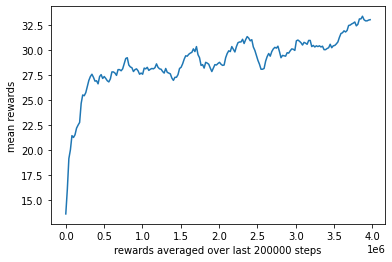

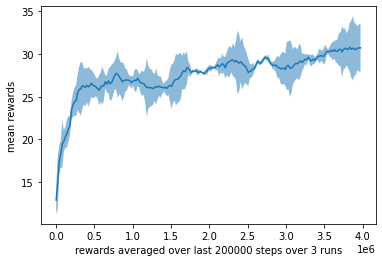

In [4]:
# Running Warehouse IAM-128 3 times with command:
# This was the first run: However I think we need to change to a mini batch of 8 since it might get better results
args = "--env-name Warehouse --yaml-file IAM_static --fnn-hidden-sizes 512,256 --rec-hidden-size 128 --algo ppo --recurrent-policy --use-gae --lr 2.5e-4 --clip-param 0.1 --value-loss-coef 1 --num-processes 10 --num-steps 8 --num-mini-batch 4 --log-interval 100 --use-linear-lr-decay --entropy-coef 0.01"

plot_data("output04-06-2021-17-29-07.txt")
# plot_data("output04-06-2021-23-01-04.txt")
# plot_data("output04-07-2021-04-04-57.txt")
plot_runs(["output04-06-2021-17-29-07.txt", "output04-06-2021-23-01-04.txt", "output04-07-2021-04-04-57.txt"], show=True)

data/output04-07-2021-11-47-30.txt
time_elapsed: 13164 seconds or 219 minutes
Final reward:  28.531250000000004


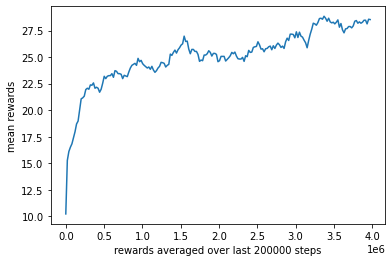

In [10]:
# Run of FNN 3 times with command:

plot_data("output04-07-2021-11-47-30.txt")

data/output04-06-2021-17-29-07.txt
data/output04-06-2021-23-01-04.txt
data/output04-07-2021-04-04-57.txt
Final reward:  30.718954248366014
data/output04-07-2021-11-47-30.txt
data/output04-07-2021-15-27-18.txt
Final reward:  28.714285714285726
Elapsed time average IAM: 5.033333333333333  Hours
Elapsed time average FNN: 3.716666666666667  Hours


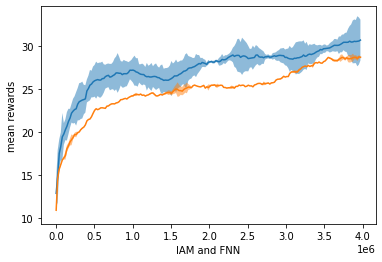

In [11]:
# Combine data of IAM and plot:
average_over_steps = 400000
average_time = plot_runs(["output04-06-2021-17-29-07.txt", "output04-06-2021-23-01-04.txt", "output04-07-2021-04-04-57.txt"],average_over_last_steps=average_over_steps, show=False)
average_time_FNN = plot_runs(["output04-07-2021-11-47-30.txt", "output04-07-2021-15-27-18.txt"],average_over_last_steps=average_over_steps, show=False)
plt.xlabel("IAM and FNN")
plt.show()
# Interesting to see that the IAM model took much more time compared to the FNN
# Also note that there is a lot more variance in the IAM model.
print("Elapsed time average IAM:", average_time//60/60, " Hours")
print("Elapsed time average FNN:", average_time_FNN//60/60, " Hours")

['--seed', '0']
Currently using configfile:  configs/warehouse/IAM_static.yaml
Log file:  data/output04-06-2021-17-29-07.txt
Starting new run: with args Namespace(algo='ppo', alpha=0.99, clip_param=0.1, cuda=False, cuda_deterministic=False, entropy_coef=0.01, env_name='Warehouse', eps=1e-05, eval_interval=None, fnn_hidden_sizes=[512, 256], gae_lambda=0.95, gail=False, gail_batch_size=128, gail_epoch=5, gail_experts_dir='./gail_experts', gamma=0.99, log_dir='/tmp/gym/', log_interval=100, lr=0.00025, max_grad_norm=0.5, num_env_steps=4000000.0, num_mini_batch=8, num_processes=10, num_steps=8, ppo_epoch=4, rec_hidden_size=128, recurrent_policy=True, save_dir='./trained_models/', save_interval=100, seed=0, use_gae=True, use_linear_lr_decay=True, use_proper_time_limits=False, value_loss_coef=1.0, yaml_file='IAM_static')
And parameters: {'env_type': 'warehouse', 'num_frames': 1, 'num_fc_units': [256], 'influence': True, 'attention': False, 'automatic_dpatch': False, 'manual_dpatch': True, 'in

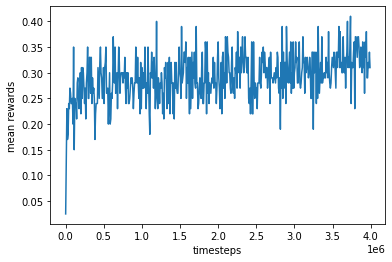

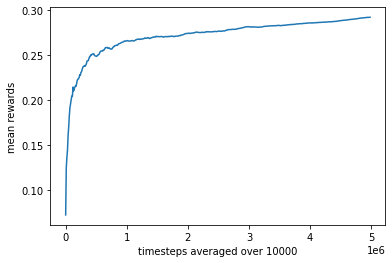

KeyboardInterrupt: 

In [11]:
import torch
# Gijs: I checked and can have a max of 6 threads. Check your computer by calling this in your regular python console: import torch; torch.get_num_threads()
torch.set_num_threads(8)
# Running Warehouse FNN 8 obs 3 times with command:
args = "--env-name Warehouse --yaml-file FNN --fnn-hidden-sizes 640,256 --algo ppo --use-gae --lr 2.5e-4 --clip-param 0.1 --value-loss-coef 1 --num-processes 8 --num-steps 1 --num-mini-batch 8 --log-interval 100 --use-linear-lr-decay --entropy-coef 0.01"
arg_list = args.split(" ")
for i in range(0,3):
    seed_arg = ['--seed', str(10*i)]
    main = Main(arg_list + seed_arg)
    main.run()
    plot_data("output"+main.data_saver.file_name)